In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Problema di fisica

## Testo
Due atleti stanno facendo una gara di corsa su un rettilineo. Il primo atleta corre alla velocità costante di 9 m/s e parte 16 m più indietro rispetto al secondo corridore, che invece ha una velocità costante di 8 m/s. Dopo quanto tempo il primo corridore raggiunge il secondo? Quanto spazio hanno percorso i due atleti fino a quell'istante?

### Dati

- velocità primo atleta = 9 m/s
- velocità second atleta = 8 m/s
- posizione iniziale primo altleta = 16 m dietro il secondo

## Analisi del problema

Il problema presenta due moti:

1. Rettilineo Uniforme che parte più indietro ma con veloctà maggiore
2. Rettilineo Uniforme che parte più avanti ma con velocità minore

Entrambi i moti iniziano nello stesso istante per tanto $t_0$ per entrambi i moti può essere fissato a $0$.

### Legge moto uniforme

$$
s(t) = s_0 + v(t-t_0)
$$

$$
s(t) = s_0 + vt
$$

La legge va applicata due volte per i due moti.
Per poterle distinguere il primo atleta avrà pedice a e il secondo atleta avrà pedice b.

Per entrambi si omette il termine $t_0$ poiché è nullo.

Il valore $s_0$ è diverso nei due moti. La posizione iniziale dei due atleti  differiranno di 16 metri.

Per il disegno che abbiamo effetuato all'inizio posizioniamo il secondo atleta nella posizione $s_{0,b} = 0$ e il primo 16 metri prima ovvero a $s_{0,a} = -16$.

I due corridori si raggiungono quando si trovano nello stesso istante nella stessa posizione, quindi le due incognite $s$ e $t$ non avranno pedice, visto che si riferiscono agli stessi valori per i due moti.

### Equazioni da usare

$$
s = s_{0,a} + v_a t \\
s = s_{0,b} + v_b t \\
$$


## Definizione delle equazioni in Sympy

### Simboli usati e dati

In [4]:
s, s0a, va, t, s0b, vb = sym.symbols('s s_0a v_a t s_0b v_b ')

### Definizione Equazioni

In [5]:
moto1 = sym.Eq(s, s0a + va*t)
moto2 = sym.Eq(s, s0b + vb*t)

In [6]:
moto1

Eq(s, s_0a + t*v_a)

In [7]:
moto2

Eq(s, s_0b + t*v_b)

### Svolgimento

Visto che i due moti avranno lo stesso valore finale si euguagliano le due espressioni per $s$

In [8]:

eq = sym.Eq(moto1.rhs, moto2.rhs)

In [9]:
eq

Eq(s_0a + t*v_a, s_0b + t*v_b)

Risoluzione della equazione rispetto all'incongita $t$

In [10]:
formula_tempo_incontro = sym.solve(eq, t)[0]
formula_tempo_incontro

(-s_0a + s_0b)/(v_a - v_b)

In [11]:
tempo_incontro = formula_tempo_incontro.subs(((s0a, -16), (s0b, 0), (va, 9), (vb, 8)))
tempo_incontro

16

Sostituiamo il valore di $t$ al primo moto.

In [33]:
spazio_finale = moto1.subs(((s0a, -16), (va, 9), (t,tempo_incontro)))
spazio_finale

Eq(s, 128)

## Grafico

Vettore con i tempi da $0$ a $20$ secondi.

In [49]:
t = np.arange(0,20, 0.1)

Vettori con le posizioni dei due moti durante i 20 secondi.

In [54]:
sa = -16 + 9*t
sb = 8*t

### Creazione del grafico

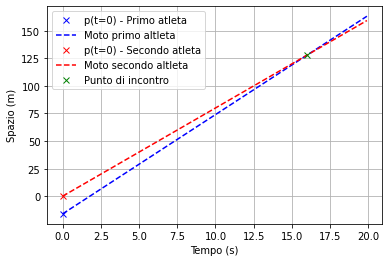

In [69]:
plt.plot(0,-16, 'xb', label='p(t=0) - Primo atleta')
plt.plot(t, sa, 'b--',label='Moto primo altleta')
plt.plot(0,0, 'xr', label='p(t=0) - Secondo atleta')
plt.plot(t, sb, 'r--',label='Moto secondo altleta')
plt.plot(16, 128, 'xg', label='Punto di incontro')
plt.xlabel('Tempo (s)')
plt.ylabel('Spazio (m)')
plt.legend(loc='upper left')
plt.grid()
plt.savefig('immagine.png', dpi=150)
plt.show()